In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签, 有中文出现的情况，需要u'内容'
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

import matplotlib as mpl
mpl.rcParams.update({'font.size': 16})

# 定义问题

假设有一个回归问题:
给定数据集$\{x^i,y^i\}_{i=1}^N$, 其中$x^i=(x^i_1,x^i_2) \in \mathbb{R}^2$,$y^i \in \mathbb{R}$   

回归模型 $y = w^Tx=w_1x_1+w_2 x_2$ (设模型的bias为0）  

损失函数取为均方误差 $L(w_1,w_2) = \frac{1}{N} \sum_{i=1}^N L_i(x^i,y^i)  = \frac{1}{N} \sum_{i=1}^N (w_1x_1^i+w_2 x_2^i-y^i)^2$


# 构造数据

数据点根据线性回归 $y=0.1 x_1+0.2 x_2+\epsilon$，

其中  
-  $x_1 \sim 1*N(0,1)$
- $x_2 \sim 10*N(0,1)$
- $\epsilon$为噪音, 分布为 $\epsilon \sim N(0,1)$  



In [2]:
np.random.seed(20)
N = 200
x1s,x2s = 1*np.random.randn(N,1),10*np.random.randn(N,1)
ys = x1s*0.1+x2s*0.2+np.random.randn(N,1)

定义每一个点的损失函数$L_i(x^i,y^i)$  

为了可视化损失函数在某一个方向上的几何形状，同时定义了在$w_1$和$w_2$截面上的损失函数 `funw2`和`funw1`



In [3]:
def fun(w1,w2,x1,x2,y):
    return (w1*x1+w2*x2-y)**2

def funw1(w1,x1,x2,y):
    return  fun(w1,0.2,x1,x2,y)

def funw2(w2,x1,x2,y):
    return  fun(0.1,w2,x1,x2,y)

# 可视化损失函数

##  可视化原始数据的损失函数

In [4]:
w1 = np.arange(-10,10,0.01)
w2 = np.arange(-4,4,0.01)
W1,W2= np.meshgrid(w1,w2)

In [5]:
L = np.zeros_like(W1)
for x1,x2,y in zip(x1s,x2s,ys):
    L += fun(W1,W2,x1,x2,y)
L = L/N

In [6]:
Lw1 = np.zeros_like(w1)
for x1,x2,y in zip(x1s,x2s,ys):
    Lw1 += funw1(w1,x1,x2,y)
Lw1 = Lw1/N


In [7]:
Lw2 = np.zeros_like(w2)
for x1,x2,y in zip(x1s,x2s,ys):
    Lw2 += funw2(w2,x1,x2,y)
Lw2 = Lw2/N

(0, 100)

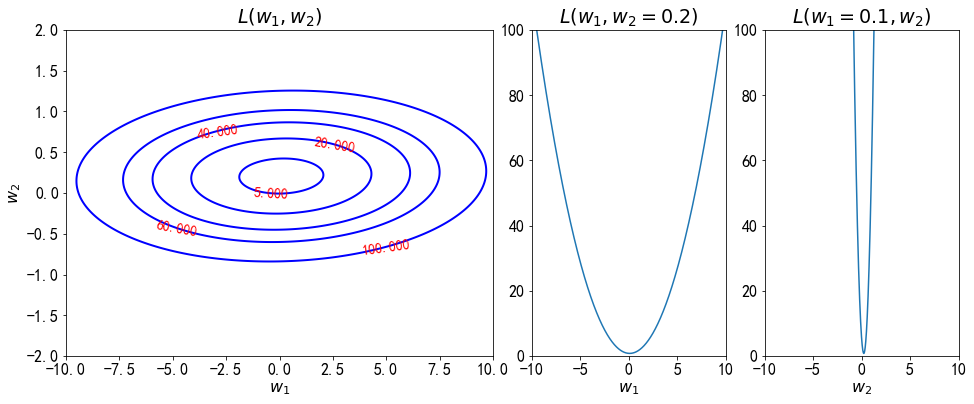

In [8]:
mpl.rcParams.update({'font.size': 16})
fig,ax = plt.subplots(1,4,figsize=(16,6))
gs = gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0, 0:2])
ax2 = plt.subplot(gs[0,2])
ax3 = plt.subplot(gs[0,3])
levels = np.array([5,20,40,60,100])
CS = ax1.contour(W1,W2,L,levels,linewidths=2,colors="blue")
ax1.clabel(CS,inline=False,fontsize=14,colors='red')
ax1.set_xlabel(r'$w_1$')
ax1.set_ylabel(r'$w_2$')
ax1.set_title(r'$L(w_1,w_2)$')
ax1.set_xlim([-10,10])
ax1.set_ylim([-2,2])


ax2.plot(w1,Lw1)
ax2.set_title(r'$L(w_1,w_2=0.2)$')
ax2.set_xlabel(r'$w_1$')
ax2.set_xlim([-10,10])
ax2.set_ylim([0,100])

ax3.plot(w2,Lw2)
ax3.set_title(r'$L(w_1=0.1,w_2)$')
ax3.set_xlabel(r'$w_2$')
ax3.set_xlim([-10,10])
ax3.set_ylim([0,100])


##  可视化标准化数据的损失函数

对数据集$\{z^i\}_{i=1}^N, z^i\in \mathbb{R}$标准化  
  
$\tilde{z}^i = \frac{z^i-\mu}{\sigma}$  

其中: 
- $\mu = \frac{1}{N} \sum_{i=1}^N z^i$  
- $\sigma = \frac{1}{N} \sum_{i=1}^N (z^i-\mu)^2$

In [9]:
x1s_norm = (x1s-x1s.mean())/x1s.std()
x2s_norm = (x2s-x2s.mean())/x2s.std()

In [10]:
w1 = np.arange(-5,5,0.01)
w2 = np.arange(-5,5,0.01)
W1,W2= np.meshgrid(w1,w2)

L = np.zeros_like(W1)
for x1,x2,y in zip(x1s_norm,x2s_norm,ys):
    L += fun(W1,W2,x1,x2,y)
L = L/N

# 标准化后数据的损失函数在(w1=0,w2=2)取到最小值；具体见损失函数图形。
def funw1(w1,x1,x2,y):
    return  fun(w1,2,x1,x2,y)

Lw1 = np.zeros_like(w1)
for x1,x2,y in zip(x1s_norm,x2s_norm,ys):
    Lw1 += funw1(w1,x1,x2,y)
Lw1 = Lw1/N

Lw2 = np.zeros_like(w2)
for x1,x2,y in zip(x1s_norm,x2s_norm,ys):
    Lw2 += funw2(w2,x1,x2,y)
Lw2 = Lw2/N

In [11]:
print(L.min())
print(Lw1.min())
print(Lw2.min())

0.8273809417862903
0.8277090705164235
0.8275017922092377


(0, 10)

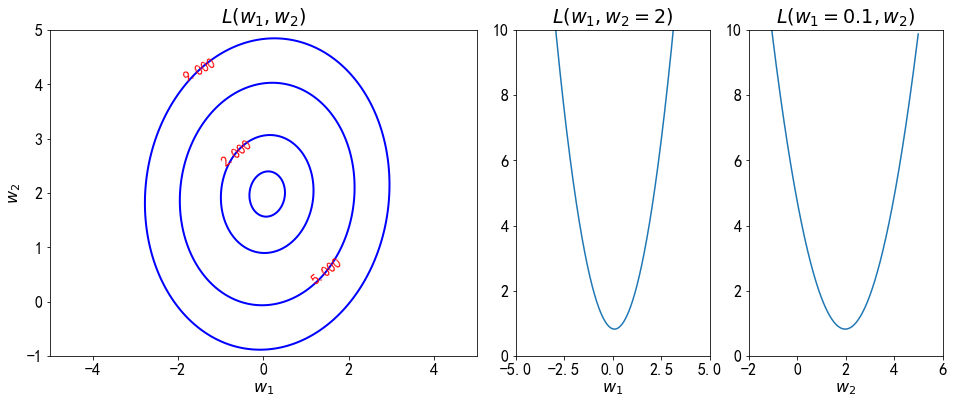

In [12]:
mpl.rcParams.update({'font.size': 16})
fig,ax = plt.subplots(1,4,figsize=(16,6))
gs = gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0, 0:2])
ax2 = plt.subplot(gs[0,2])
ax3 = plt.subplot(gs[0,3])
levels = np.array([1,2,5,9])
CS = ax1.contour(W1,W2,L,levels,linewidths=2,colors="blue")
ax1.clabel(CS,inline=False,fontsize=14,colors='red')
ax1.set_xlabel(r'$w_1$')
ax1.set_ylabel(r'$w_2$')
ax1.set_title(r'$L(w_1,w_2)$')
ax1.set_xlim([-5,5])
ax1.set_ylim([-1,5])


ax2.plot(w1,Lw1)
ax2.set_title(r'$L(w_1,w_2=2)$')
ax2.set_xlabel(r'$w_1$')
ax2.set_xlim([-5,5])
ax2.set_ylim([0,10])


ax3.plot(w2,Lw2)
ax3.set_title(r'$L(w_1=0.1,w_2)$')
ax3.set_xlabel(r'$w_2$')
ax3.set_xlim([-2,6])
ax3.set_ylim([0,10])
